# Binance API Algorithm

In [57]:
# Sources

# https://bit.ly/42HLG4a
# https://bit.ly/48jkoCf
# https://bit.ly/49dBqmw

In [58]:
import websocket
import json
import pandas as pd
from binance.client import Client

In [59]:
client = Client(tld="us")

info = client.get_exchange_info()

# extract all symbol values (n["symbol"]) by looping through exchange info (info["symbols"])
pairs = [n["symbol"] for n in info["symbols"] if n["symbol"].endswith("USDT")]

pairs = [n.lower() + "@kline_5m" for n in pairs]

list_pairs = "/".join(pairs)

In [60]:
# Function 2: Convert client streams to dataframe

def manipulate (data):
    value = data["data"]["k"]
    price = value["c"]
    sym = value["s"]
    event_time = pd.to_datetime([data["data"]["E"]], unit="ms")
    df = pd.DataFrame([[price, sym]], index=event_time)
    return df

In [61]:
# Function 1: Websocket client

def on_message (wsapp, message):
    json_message = json.loads(message)
    dataframe = manipulate(json_message)
    dataframe.to_csv("Pair-Prices.csv", mode="a", header=False)

socket = "wss://stream.binance.us:9443/stream?streams=" + list_pairs

wsapp = websocket.WebSocketApp(socket, on_message=on_message)

wsapp.run_forever()

True

In [62]:
df = pd.read_csv("Pair-Prices.csv", header=None)

df.columns = ["Timestamp", "Price", "Pair"]

In [86]:
# access single column
col = df[df.Pair == "RNDRUSDT"]

# sort values by column
col = col.sort_values("Timestamp")

# set index to column values
col = col.set_index("Timestamp")

In [87]:
#df

<AxesSubplot:xlabel='Timestamp'>

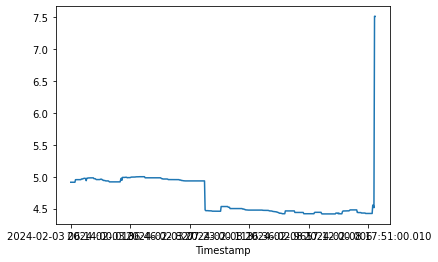

In [88]:
col.Price.plot()

In [74]:
# Function #3 - access price changes of each Pair
def analyze(Pair):
    frame = df[df.Pair == Pair]
    frame = frame.sort_values("Timestamp")
    frame = frame.set_index("Timestamp")
    
    # Formula for Rate of Return
    frame = frame.Price[-1] / frame.Price[0] - 1 # divide last and first indexed "Price" value
    #return "{:.2%}".format(frame)
    return frame * 100

In [85]:
analyze("RNDRUSDT")

In [76]:
# access all data from "Pairs" column, placed in array format
uq = df.Pair.unique()

returns = []

df = pd.read_csv("Pair-Prices.csv", header=None)
df.columns = ["Timestamp", "Price", "Pair"]

for Pair in uq:
    returns.append(analyze(Pair))

In [81]:
returns

In [53]:
# pd.Series creates a column-like structure, using "index" values name for each row
series = pd.Series(returns, index = uq)

In [82]:
series

In [83]:
series.nlargest(5)

In [84]:
series.nsmallest(5)